<a href="https://colab.research.google.com/github/datle2403/datle2403/blob/main/iris_analyse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install pingouin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [79]:
df=pd.read_csv('Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [80]:
df.shape

(150, 6)

In [81]:
df.drop('Id',axis=1,inplace=True)

In [82]:
def inspect_data(data):
    return pd.DataFrame({"Data Type":data.dtypes,"No of Levels":data.apply(lambda x: x.nunique(),axis=0), "Levels":data.apply(lambda x: str(x.unique()),axis=0)})
inspect_data(df)

,Data Type,No of Levels,Levels
SepalLengthCm,float64,35,[5.1 4.9 4.7 4.6 5. 5.4 4.4 4.8 4.3 5.8 5.7 5...
SepalWidthCm,float64,23,[3.5 3. 3.2 3.1 3.6 3.9 3.4 2.9 3.7 4. 4.4 3...
PetalLengthCm,float64,43,[1.4 1.3 1.5 1.7 1.6 1.1 1.2 1. 1.9 4.7 4.5 4...
PetalWidthCm,float64,22,[0.2 0.4 0.3 0.1 0.5 0.6 1.4 1.5 1.3 1.6 1. 1...
Species,object,3,['Iris-setosa' 'Iris-versicolor' 'Iris-virgini...


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [84]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [85]:
df['Sepal_area']=df['SepalLengthCm']*df['SepalWidthCm']
df['Petal_area']=df['PetalLengthCm']*df['PetalWidthCm']

I will cover mean, median, std, 

                 SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
Species                                                                     
Iris-setosa              5.006         3.418          1.464         0.244   
Iris-versicolor          5.936         2.770          4.260         1.326   
Iris-virginica           6.588         2.974          5.552         2.026   

                 Sepal_area  Petal_area  
Species                                  
Iris-setosa         17.2088      0.3628  
Iris-versicolor     16.5262      5.7204  
Iris-virginica      19.6846     11.2962  


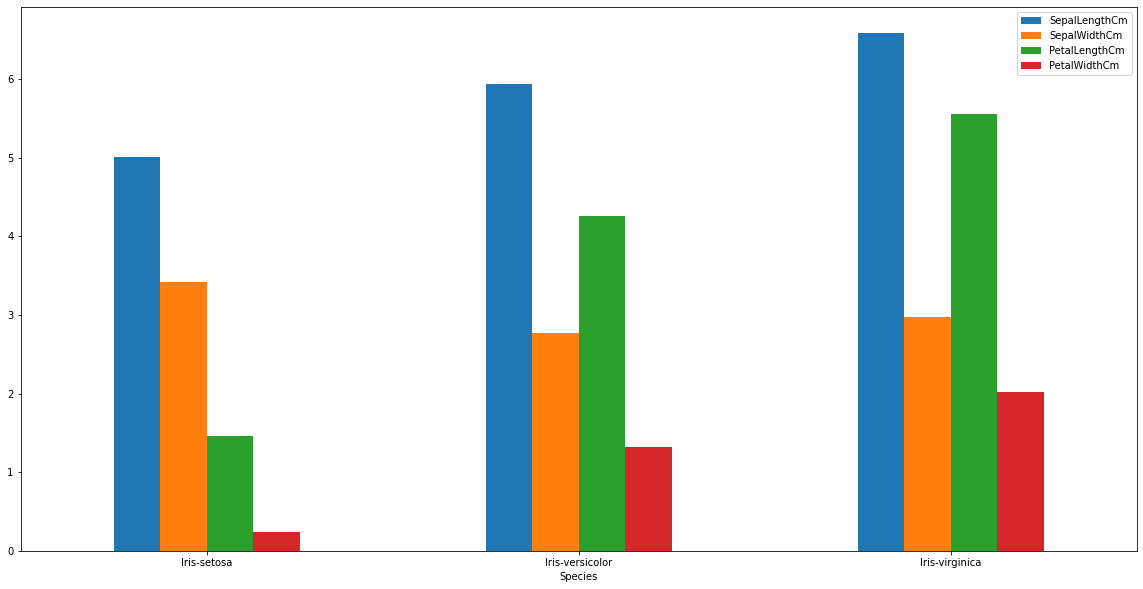

In [86]:
import matplotlib.pyplot as plt
mean=df.groupby('Species').mean()
print(mean)
a=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
b=['Sepal_area','Petal_area']
mean[a].plot.bar(rot=0,figsize=(20, 10))

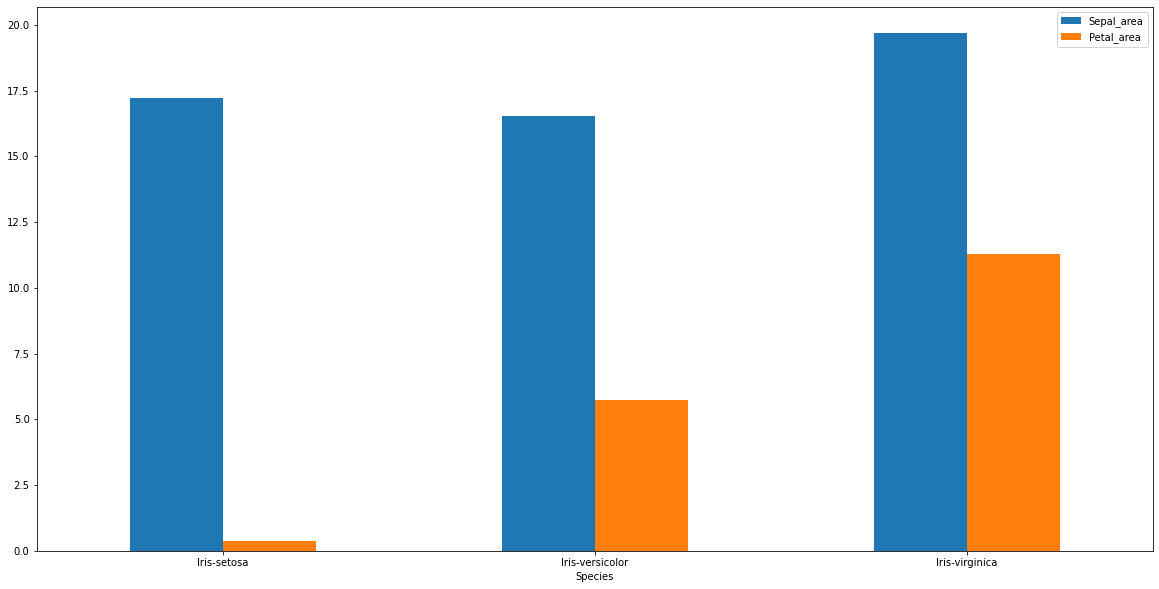

In [87]:
b=['Sepal_area','Petal_area']
mean[b].plot.bar(rot=0,figsize=(20, 10))

flower C has largest size, setosa is smallest in size


from the graph, sepal_length -> petal length -> sepal width -> petal width for versicolor and virginica. whereas the versus happen for setosa 

                 SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
Species                                                                     
Iris-setosa                5.0           3.4           1.50           0.2   
Iris-versicolor            5.9           2.8           4.35           1.3   
Iris-virginica             6.5           3.0           5.55           2.0   

                 Sepal_area  Petal_area  
Species                                  
Iris-setosa          17.000       0.300  
Iris-versicolor      16.385       5.615  
Iris-virginica       20.060      11.445  


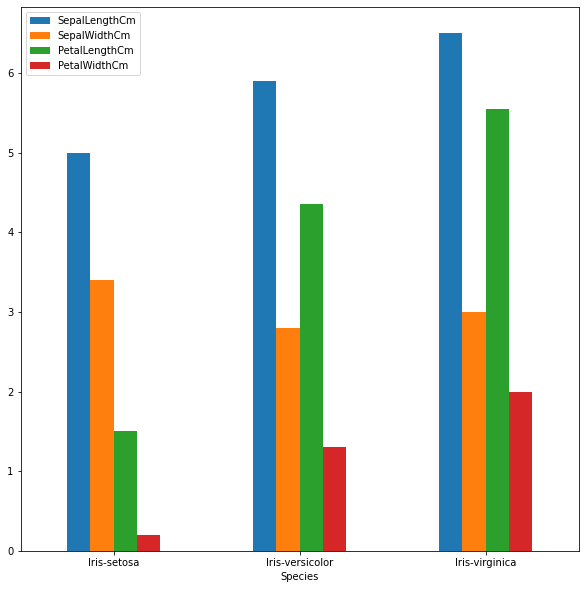

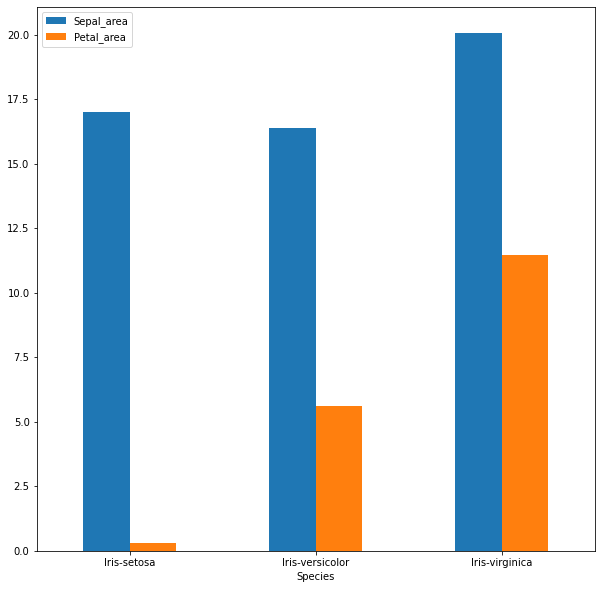

In [88]:
median=df.groupby('Species').median()
print(median)
median[a].plot.bar(rot=0,figsize=(10, 10))
median[b].plot.bar(rot=0,figsize=(10, 10))

In [89]:
# it is normal distributed
mean.subtract(median, axis = 1)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Sepal_area,Petal_area
Species,,,,,,
Iris-setosa,0.006,0.018,-0.036,0.044,0.2088,0.0628
Iris-versicolor,0.036,-0.030,-0.090,0.026,0.1412,0.1054
Iris-virginica,0.088,-0.026,0.002,0.026,-0.3754,-0.1488


Since Mean and Median almost equal, we can conclude that each feature is nearly normal distributed.

                 SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
Species                                                                     
Iris-setosa           0.352490      0.381024       0.173511      0.107210   
Iris-versicolor       0.516171      0.313798       0.469911      0.197753   
Iris-virginica        0.635880      0.322497       0.551895      0.274650   

                 Sepal_area  Petal_area  
Species                                  
Iris-setosa        2.947688    0.183248  
Iris-versicolor    2.866882    1.368403  
Iris-virginica     3.458783    2.157412  


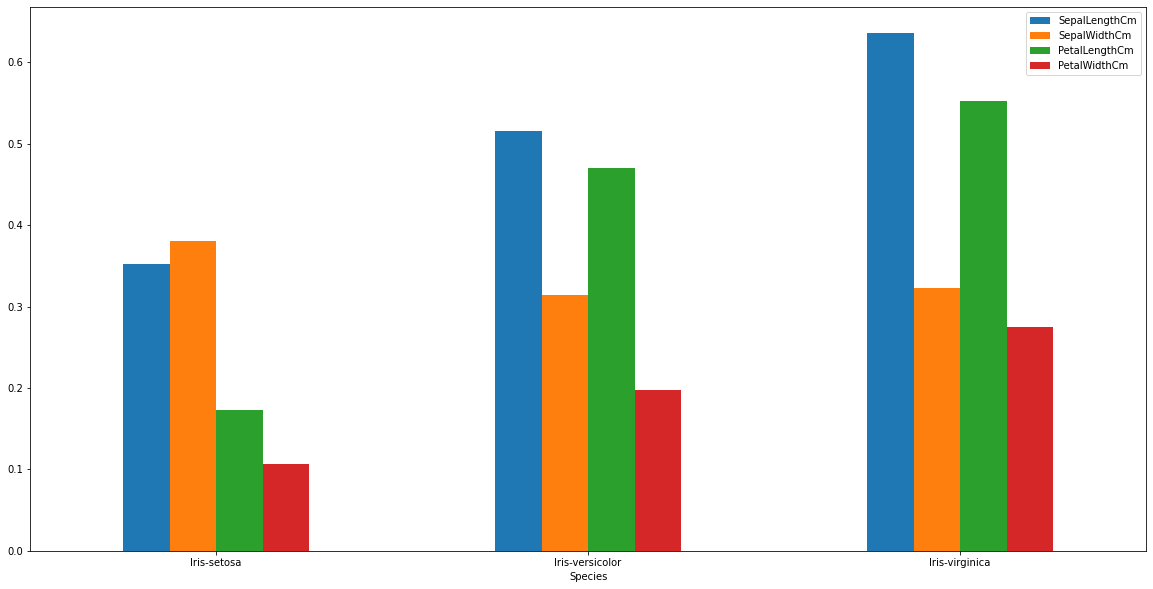

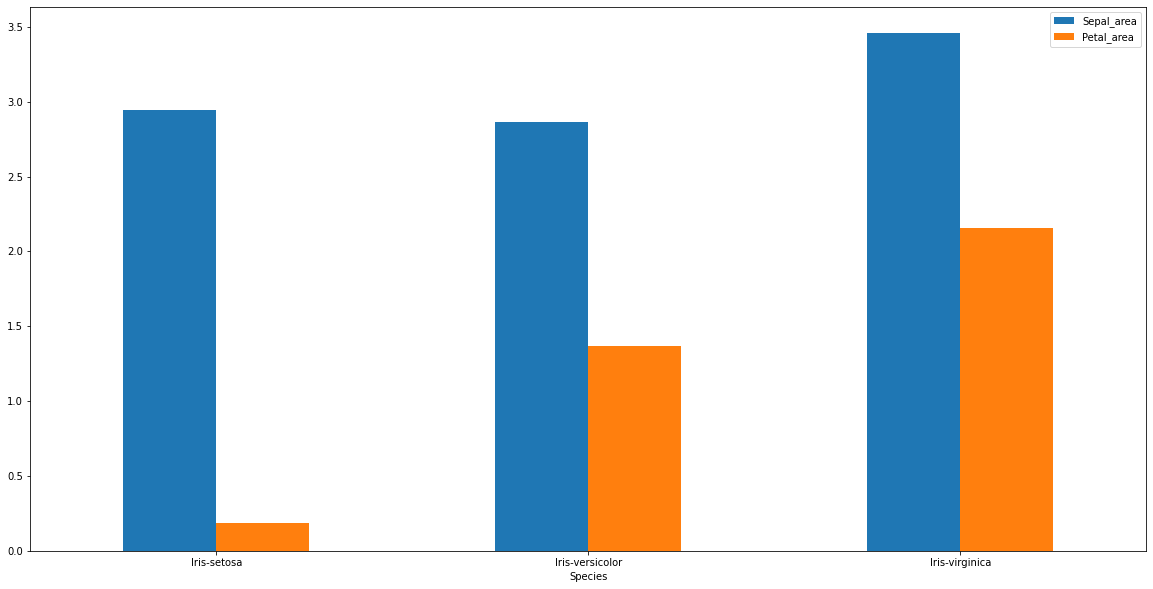

In [90]:
std=df.groupby('Species').std()
print(std)
std[a].plot.bar(rot=0,figsize=(20, 10))
std[b].plot.bar(rot=0,figsize=(20, 10))

iris-setosa has stable petallength and petalwidth. 
iris-virgincia has data varies the most. especially in sepal_length and petal length. 



the width of petal and sepal not varies much, the length is the most varies.

In setosa, the sepal shape varies more than the petal shape

Why???


In [154]:
setosa=df.loc[df['Species']=='Iris-setosa']
versicolor=df.loc[df['Species']=='Iris-versicolor']
virginica=df.loc[df['Species']=='Iris-virginica']

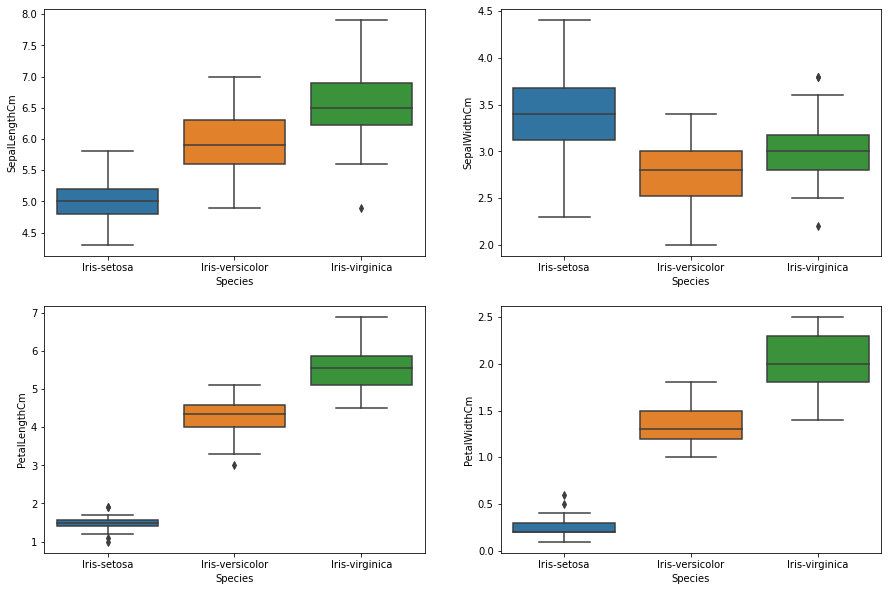

In [152]:
# box plot 
fig, ax = plt.subplots(2, 2, figsize=(15,10))
sns.boxplot(x = "Species", y = "SepalLengthCm",data = df,ax = ax[0,0])
sns.boxplot(x = "Species", y = "SepalWidthCm",data = df,ax = ax[0,1])
sns.boxplot(x = "Species", y = "PetalLengthCm",data = df,ax = ax[1,0])
sns.boxplot(x = "Species", y = "PetalWidthCm",data = df,ax = ax[1,1])


In [155]:
setosa.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Sepal_area,Petal_area
count,50.00000,50.000000,50.000000,50.00000,50.000000,50.000000
mean,5.00600,3.418000,1.464000,0.24400,17.208800,0.362800
std,0.35249,0.381024,0.173511,0.10721,2.947688,0.183248
min,4.30000,2.300000,1.000000,0.10000,10.350000,0.110000
25%,4.80000,3.125000,1.400000,0.20000,15.040000,0.265000
50%,5.00000,3.400000,1.500000,0.20000,17.000000,0.300000
75%,5.20000,3.675000,1.575000,0.30000,19.155000,0.420000
max,5.80000,4.400000,1.900000,0.60000,25.080000,0.960000


In [27]:
import scipy.stats as  stats
def check_normality(data):
    test_stat_normality, p_value_normality=stats.shapiro(data)
    print("p value:%.4f" % p_value_normality)
    if p_value_normality <0.05:
        print("Reject null hypothesis >> The data is not normally distributed")
    else:
        print("Fail to reject null hypothesis >> The data is normally distributed")

In [73]:
# I will check Sepal_area of three kind of flowers are different
s_area=setosa['Sepal_area']
ve_area=versicolor['Sepal_area']
vi_area=virginica['Sepal_area']

In [74]:
check_normality(s_area.to_numpy())

p value:0.5921
Fail to reject null hypothesis >> The data is normally distributed


In [75]:
check_normality(ve_area.to_numpy())

p value:0.8793
Fail to reject null hypothesis >> The data is normally distributed


In [76]:
check_normality(vi_area.to_numpy())

p value:0.0317
Reject null hypothesis >> The data is not normally distributed


In [33]:

# # change virginica to normal distributed
vi_area=np.log(vi_area)

In [34]:
check_normality(vi_area.to_numpy())

p value:0.1536
Fail to reject null hypothesis >> The data is normally distributed


In [77]:
def run():
  stat, pvalue_levene= stats.levene(s_area,ve_area,vi_area)
  print("p value:%.4f" % pvalue_levene)
  if pvalue_levene <0.05:
      print("Reject null hypothesis >> The variances of the samples are different.")
  else:
      print("Fail to reject null hypothesis >> The variances of the samples are same.")
run()

p value:0.6938
Fail to reject null hypothesis >> The variances of the samples are same.


In [37]:
!pip install pingouin
import pingouin as pg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [39]:
print(np.var(s_area),np.var(ve_area),np.var(vi_area))

8.51508656 8.054631559999999 0.03020373825821772


In [40]:
print(np.mean(s_area),np.mean(ve_area),np.mean(vi_area))

17.2088 16.5262 2.9648341703566508


In [45]:
result = pg.ttest(s_area,
                  ve_area,
                  correction=False)
result

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,1.173834,98,two-sided,0.243306,"[-0.47, 1.84]",0.234767,0.388,0.213445


In [46]:
from statsmodels.stats.weightstats import ttest_ind
ttest_ind(s_area,ve_area)

(1.1738342138224385, 0.2433062537574571, 98.0)

In [58]:
# ANOVA test for 3 area of 3 flowers
F, p_value = stats.kruskal(s_area, ve_area, vi_area)
print("p value:%.6f" % p_value)
if p_value <0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

p value:0.000000
Reject null hypothesis


In [51]:
import numpy as np 
from scipy.stats import t

In [59]:
# confident interval of the mean
# s_area:
def compute_CI(x):
  m = x.mean() 
  s = x.std() 
  dof = len(x)-1 
  confidence = 0.95
  t_crit = np.abs(t.ppf((1-confidence)/2,dof))
  return (m-s*t_crit/np.sqrt(len(x)), m+s*t_crit/np.sqrt(len(x))) 
print('s_area C.I is:',compute_CI(s_area))
print('vi_area C.I is:',compute_CI(vi_area))
print('ve_area C.I is:',compute_CI(ve_area))

s_area C.I is: (16.371076374677788, 18.046523625322212)
vi_area C.I is: (2.914941519519324, 3.0147268211939777)
ve_area C.I is: (15.71144118163003, 17.34095881836997)


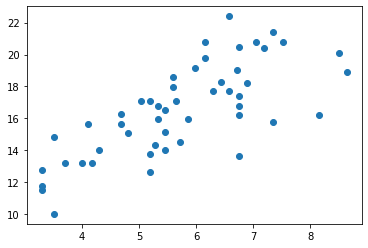

In [125]:
petal_area_s=versicolor['Petal_area']
plt.scatter(petal_area_s,ve_area)

In [95]:
setosa.corr()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Sepal_area,Petal_area
SepalLengthCm,1.000000,0.746780,0.263874,0.279092,0.899846,0.298624
SepalWidthCm,0.746780,1.000000,0.176695,0.279973,0.960028,0.290091
PetalLengthCm,0.263874,0.176695,1.000000,0.306308,0.211235,0.503883
PetalWidthCm,0.279092,0.279973,0.306308,1.000000,0.297749,0.972150
Sepal_area,0.899846,0.960028,0.211235,0.297749,1.000000,0.309451
Petal_area,0.298624,0.290091,0.503883,0.972150,0.309451,1.000000


In [94]:
versicolor.corr()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Sepal_area,Petal_area
SepalLengthCm,1.000000,0.525911,0.754049,0.546461,0.835700,0.659005
SepalWidthCm,0.525911,1.000000,0.560522,0.663999,0.904014,0.644350
PetalLengthCm,0.754049,0.560522,1.000000,0.786668,0.722695,0.917497
PetalWidthCm,0.546461,0.663999,0.786668,1.000000,0.688593,0.963786
Sepal_area,0.835700,0.904014,0.722695,0.688593,1.000000,0.731901
Petal_area,0.659005,0.644350,0.917497,0.963786,0.731901,1.000000


In [93]:
virginica.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Sepal_area,Petal_area
SepalLengthCm,1.000000,0.457228,0.864225,0.281108,0.822126,0.638533
SepalWidthCm,0.457228,1.000000,0.401045,0.537728,0.878078,0.581074
PetalLengthCm,0.864225,0.401045,1.000000,0.322108,0.713838,0.743195
PetalWidthCm,0.281108,0.537728,0.322108,1.000000,0.472139,0.870559
Sepal_area,0.822126,0.878078,0.713838,0.472139,1.000000,0.696012
Petal_area,0.638533,0.581074,0.743195,0.870559,0.696012,1.000000


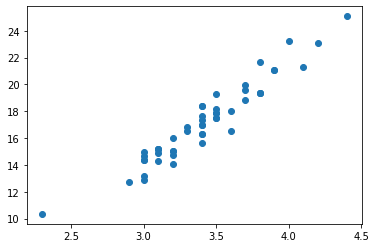

In [100]:
# we can see that from sepal width we can predict the setosa sepal area
plt.scatter(setosa['SepalWidthCm'],setosa['Sepal_area'])

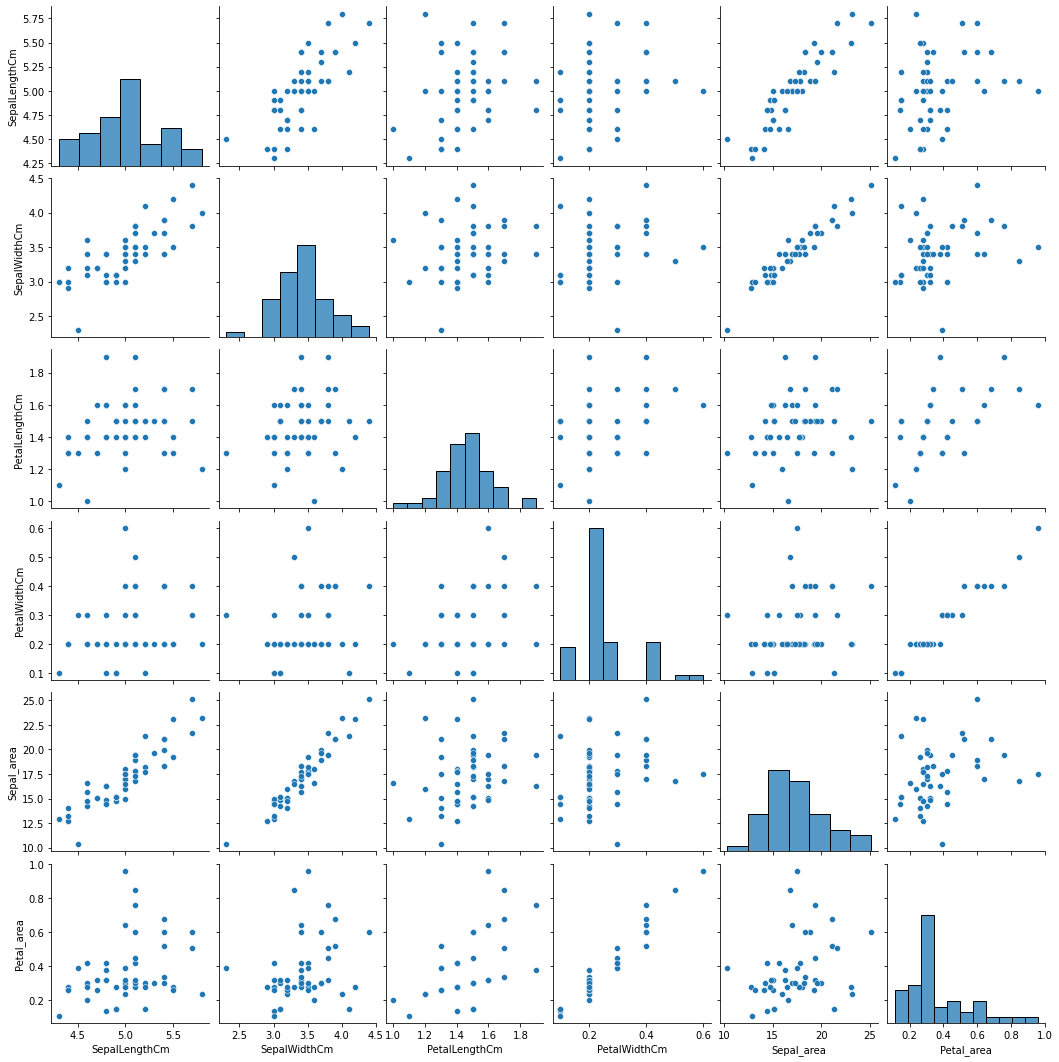

In [99]:
import seaborn as sns
sns.pairplot(setosa)

In [105]:
setosa['SepalWidthCm']

(50,)

In [109]:
from sklearn.linear_model import LinearRegression
x=setosa['SepalWidthCm'].to_numpy().reshape((-1,1)) # convert to 2-D dim
y=setosa['Sepal_area']
model = LinearRegression().fit(x, y)
r_sq = model.score(x, y)

In [111]:
# R2 score:
r_sq

0.9216532870608476

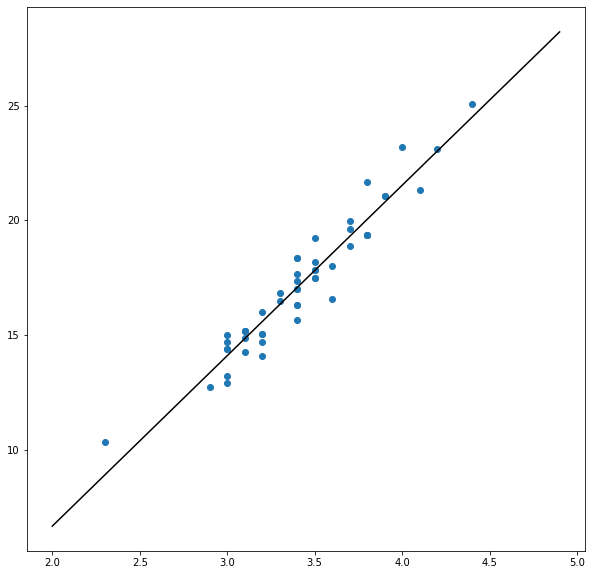

In [123]:
beta1=model.coef_[0]
beta0=model.intercept_
x1 = np.arange(2, 5, 0.1)
y1=beta1*x1+beta0
#y1 = -beta1/beta0*x1 - beta0/beta1
plt.figure(figsize=(10,10))
plt.scatter(setosa['SepalWidthCm'],setosa['Sepal_area'])
plt.plot(x1, y1, 'k')

In [140]:
y_predict=model.predict(x)
y_predict

array([17.8178127 , 14.10432062, 15.58971745, 14.84701903, 18.56051112,
       20.78860637, 17.07511428, 17.07511428, 13.3616222 , 14.84701903,
       19.30320954, 17.07511428, 14.10432062, 14.10432062, 21.53130479,
       24.50209846, 20.78860637, 17.8178127 , 20.04590795, 20.04590795,
       17.07511428, 19.30320954, 18.56051112, 16.33241587, 17.07511428,
       14.10432062, 17.07511428, 17.8178127 , 17.07511428, 15.58971745,
       14.84701903, 17.07511428, 22.27400321, 23.01670162, 14.84701903,
       15.58971745, 17.8178127 , 14.84701903, 14.10432062, 17.07511428,
       17.8178127 ,  8.9054317 , 15.58971745, 17.8178127 , 20.04590795,
       14.10432062, 20.04590795, 15.58971745, 19.30320954, 16.33241587])

In [148]:
n=x.shape[0]
x_bar=x.mean()
y_bar=y.mean()
SSE=np.sum((y-y_predict)**2)
SST=np.sum((y-y_bar)**2)
SSR=SST-SSE

MSE= SSE/(n-2)
MSR= SSR/1
MST= SST/(n-1)

Sxy= -((SSE-SSR)/beta1)
Sxx= Sxy/beta1

sigma=SSE/(n-2)

std_beta1=np.sqrt(sigma/Sxx)
std_beta0=np.sqrt(sigma*(1/n+(x_bar**2)/Sxx))

t_beta1=beta1/std_beta1
t_beta0=beta0/std_beta0

# W= {-vocung, -2} union (2, vo cung)

print(t_beta0,t_beta1)
# hypothesis testing

-7.280924934917271 22.7301850578349


In [ ]:
# we can reject the null hypothesis
# we can conclude that beta0 and beta1 are significantly different zero